# Stock Price Analysis and Technical Indicators

This notebook performs a comprehensive analysis of stock price data, including:

1. **Data Loading and Initial Exploration**
   - Loading stock price data
   - Basic data quality checks
   - Summary statistics

2. **Technical Analysis**
   - RSI (Relative Strength Index)
   - MACD (Moving Average Convergence Divergence)
   - Bollinger Bands
   - Volume Analysis

3. **Statistical Analysis**
   - Correlation Analysis
   - Outlier Detection
   - Time Series Patterns

4. **Feature Engineering and Validation**
   - Price-based features
   - Volume-based indicators
   - Technical indicators
   - Data validation checks

In [49]:
from pathlib import Path
import pandas as pd

data_path = Path("data.csv")
df = pd.read_csv(data_path)
df.head()

,formatted_date,high,low,open,close,volume,adjclose,rsi,d_return,volume_change,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
0,2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3625080000,2275.320068,55.349648,0.002830,-0.004252,...,-0.003549,0.003517,-0.000771,0.005722,0.130704,-0.036609,-0.117038,0.004296,-0.001092,1
1,2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3466220000,2270.439941,69.412265,-0.002145,-0.043822,...,0.000000,-0.003549,0.003517,-0.000771,-0.004252,0.130704,-0.036609,-0.117038,0.004296,0
2,2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3090680000,2274.639893,76.428044,0.001850,-0.108343,...,0.002830,0.000000,-0.003549,0.003517,-0.043822,-0.004252,0.130704,-0.036609,-0.117038,1
3,2017-01-17,2272.080078,2262.810059,2269.139893,2267.889893,3586950000,2267.889893,43.080303,-0.002968,0.160570,...,-0.002145,0.002830,0.000000,-0.003549,-0.108343,-0.043822,-0.004252,0.130704,-0.036609,0
4,2017-01-18,2272.010010,2263.350098,2269.139893,2271.889893,3317670000,2271.889893,43.080303,0.001764,-0.075072,...,0.001850,-0.002145,0.002830,0.000000,0.160570,-0.108343,-0.043822,-0.004252,0.130704,1


# Data Loading and Initial Exploration

In this section, we:
1. Load the required libraries (pandas for data manipulation, pathlib for file handling)
2. Read the stock price data from CSV file
3. Perform initial data exploration
   - Check data structure
   - Look for missing values
   - Examine data types
   - Review basic statistics

The dataset contains essential stock price information including:
- Open, High, Low, Close prices
- Volume
- Technical indicators (RSI, returns)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   formatted_date  1857 non-null   object 
 1   high            1857 non-null   float64
 2   low             1857 non-null   float64
 3   open            1857 non-null   float64
 4   close           1857 non-null   float64
 5   volume          1857 non-null   int64  
 6   adjclose        1857 non-null   float64
 7   rsi             1857 non-null   float64
 8   d_return        1857 non-null   float64
 9   volume_change   1857 non-null   float64
 10  r_lag1          1857 non-null   float64
 11  r_lag2          1857 non-null   float64
 12  r_lag3          1857 non-null   float64
 13  r_lag4          1857 non-null   float64
 14  r_lag5          1857 non-null   float64
 15  v_lag1          1857 non-null   float64
 16  v_lag2          1857 non-null   float64
 17  v_lag3          1857 non-null   f

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
high,1857.0,3.538908e+03,8.274374e+02,2.271780e+03,2.789800e+03,3.399960e+03,4.257160e+03,5.341880e+03
low,1857.0,3.498879e+03,8.187678e+02,2.191860e+03,2.761730e+03,3.366840e+03,4.201640e+03,5.302400e+03
open,1857.0,3.519565e+03,8.229914e+02,2.267780e+03,2.779820e+03,3.384560e+03,4.229340e+03,5.340260e+03
close,1857.0,3.520153e+03,8.233588e+02,2.237400e+03,2.776420e+03,3.385490e+03,4.227260e+03,5.321410e+03
volume,1857.0,4.079932e+09,1.002106e+09,1.296530e+09,3.461920e+09,3.873100e+09,4.445260e+09,9.976520e+09
adjclose,1857.0,3.520153e+03,8.233588e+02,2.237400e+03,2.776420e+03,3.385490e+03,4.227260e+03,5.321410e+03
rsi,1857.0,5.785898e+01,2.609484e+01,5.836125e-01,3.668223e+01,6.180674e+01,7.998321e+01,9.939992e+01
d_return,1857.0,5.253649e-04,1.195257e-02,-1.198406e-01,-3.840597e-03,7.423349e-04,6.223700e-03,9.382774e-02
volume_change,1857.0,1.445940e-02,1.781457e-01,-6.586958e-01,-6.763608e-02,-3.878939e-03,7.636872e-02,1.270527e+00
r_lag1,1857.0,5.293320e-04,1.195117e-02,-1.198406e-01,-3.815520e-03,7.423349e-04,6.223700e-03,9.382774e-02


In [34]:
df.isnull().sum()

formatted_date    0
high              0
low               0
open              0
close             0
volume            0
adjclose          0
rsi               0
d_return          0
volume_change     0
r_lag1            0
r_lag2            0
r_lag3            0
r_lag4            0
r_lag5            0
v_lag1            0
v_lag2            0
v_lag3            0
v_lag4            0
v_lag5            0
trend             0
dtype: int64

In [35]:
df.shape

(1857, 21)

In [36]:
df['formatted_date'] = pd.to_datetime(df['formatted_date'])
df = df.set_index('formatted_date')


# Data Validation

Before proceeding with the analysis, we'll perform essential financial data validations:
1. Price Logic Checks
2. Date Frequency Analysis
3. Duplicate Date Check

In [45]:
# 1. Price Logic Checks
print("Performing price logic validations...")
try:
    assert (df['high'] >= df['low']).all(), "High price should always be >= Low price"
    assert ((df['open'] >= df['low']) & (df['open'] <= df['high'])).all(), "Open price should be between High and Low"
    assert ((df['close'] >= df['low']) & (df['close'] <= df['high'])).all(), "Close price should be between High and Low"
    print("✓ All price logic checks passed")
except AssertionError as e:
    print(f"❌ Validation failed: {str(e)}")

# 2. Date Frequency & Missing Days Analysis
print("\nAnalyzing date frequency and missing days...")
daily = df.asfreq('B')  # business days
missing_days = daily.index[daily['close'].isna()]
if len(missing_days) > 0:
    print(f"Found {len(missing_days)} missing business days:")
    print(missing_days.strftime('%Y-%m-%d').tolist())
else:
    print("✓ No missing business days found")

# 3. Duplicate Dates Check
print("\nChecking for duplicate dates...")
dups = df.index.duplicated().sum()
if dups > 0:
    print(f"❌ Found {dups} duplicate dates")
    print("Duplicate dates:", df.index[df.index.duplicated()].strftime('%Y-%m-%d').tolist())
else:
    print("✓ No duplicate dates found")

Performing price logic validations...
✓ All price logic checks passed

Analyzing date frequency and missing days...
Found 69 missing business days:
['2017-01-16', '2017-02-20', '2017-04-14', '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04', '2018-09-03', '2018-11-22', '2018-12-05', '2018-12-25', '2019-01-01', '2019-01-21', '2019-02-18', '2019-04-19', '2019-05-27', '2019-07-04', '2019-09-02', '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17', '2020-04-10', '2020-05-25', '2020-07-03', '2020-09-07', '2020-11-26', '2020-12-25', '2021-01-01', '2021-01-18', '2021-02-15', '2021-04-02', '2021-05-31', '2021-07-05', '2021-09-06', '2021-11-25', '2021-12-24', '2022-01-17', '2022-02-21', '2022-04-15', '2022-05-30', '2022-06-20', '2022-07-04', '2022-09-05', '2022-11-24', '2022-12-26', '2023-01-02', '2023-01-16', '2023-02-20', '2023-04-07', '2023-05-29', '2023-06-19', '2023-07-04

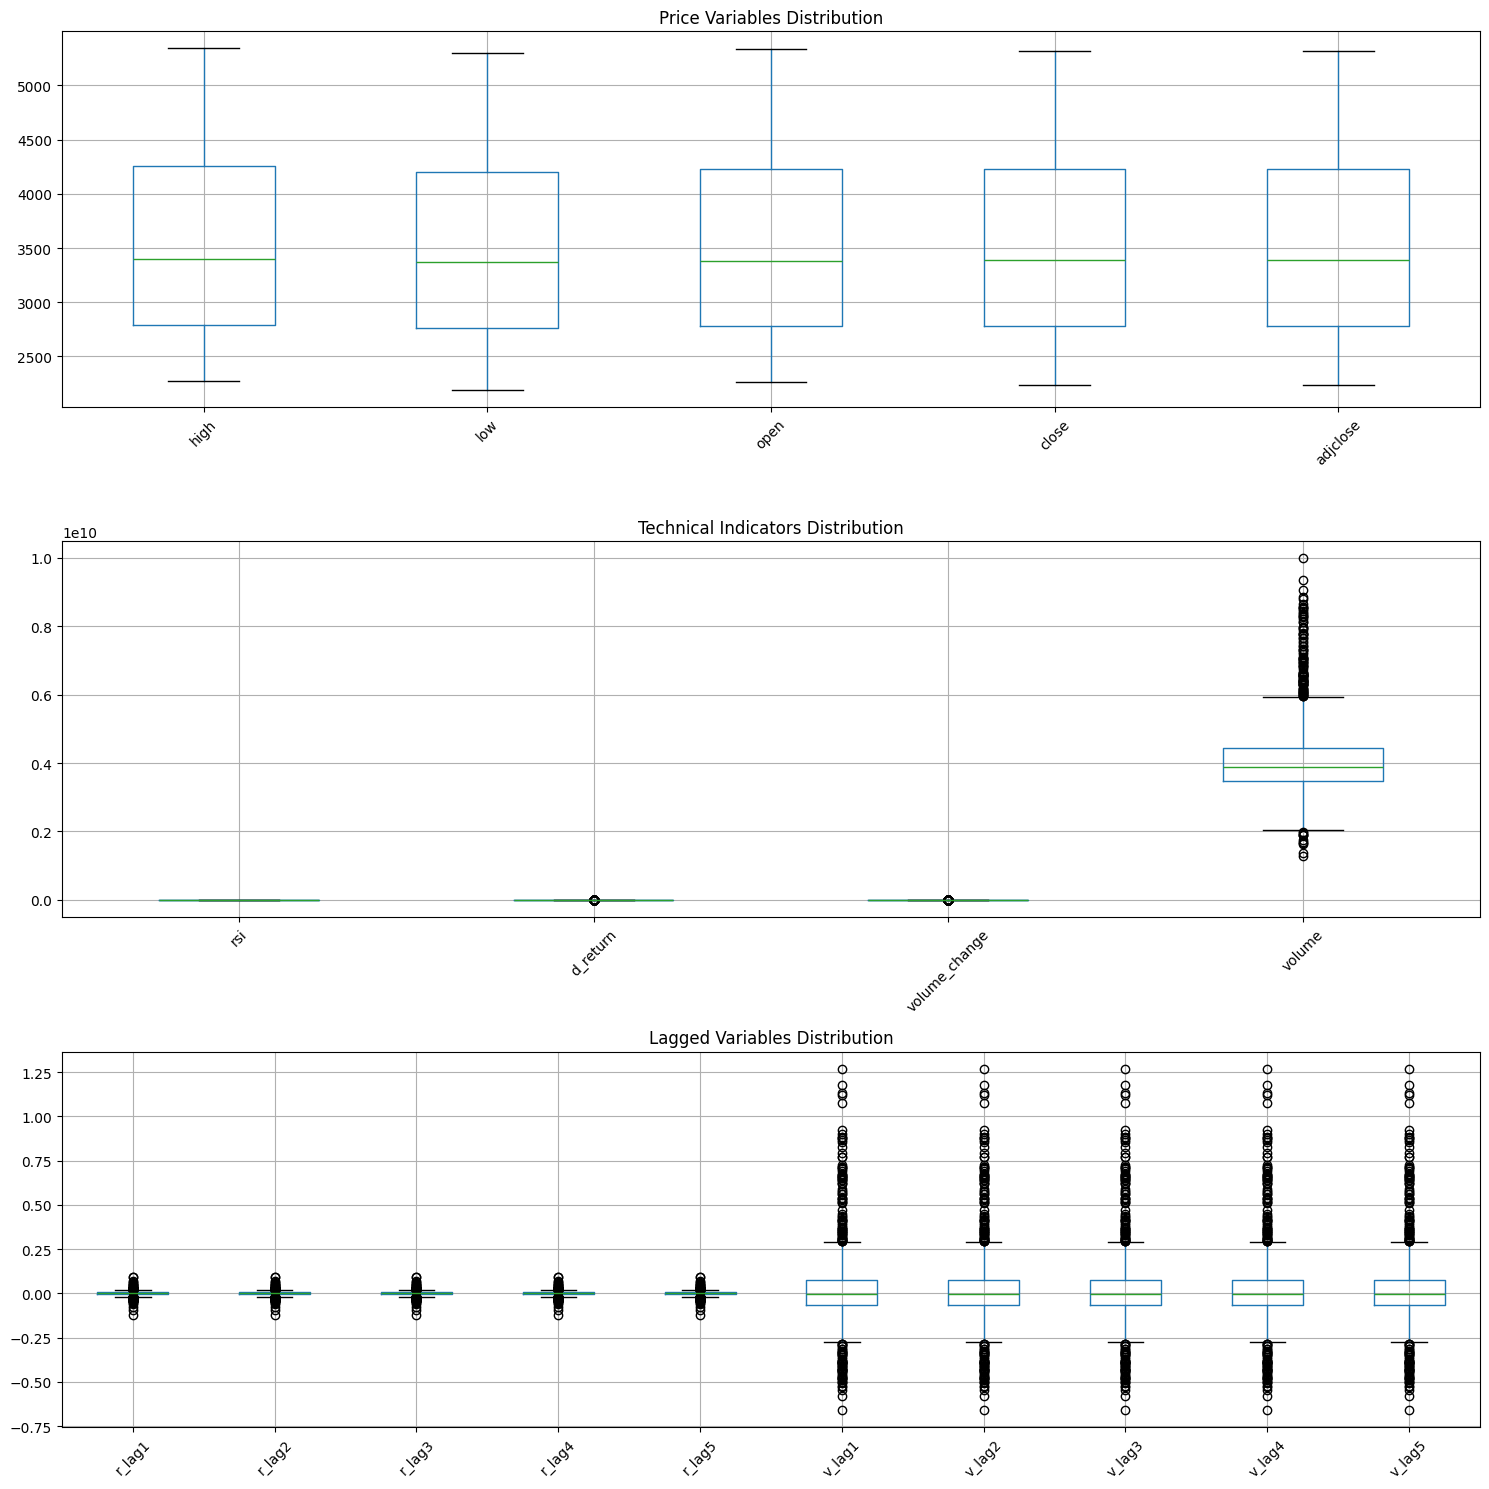

In [50]:
# Select all numeric columns (including both float64 and int64)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Group variables for better visualization
price_cols = ['high', 'low', 'open', 'close', 'adjclose']
technical_cols = ['rsi', 'd_return', 'volume_change', 'volume']
lag_cols = [col for col in numeric_columns if 'lag' in col]

# Create separate boxplots for each group
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Price variables
df[price_cols].boxplot(ax=axes[0])
axes[0].set_title('Price Variables Distribution')
axes[0].tick_params(axis='x', rotation=45)

# Technical indicators
df[technical_cols].boxplot(ax=axes[1])
axes[1].set_title('Technical Indicators Distribution')
axes[1].tick_params(axis='x', rotation=45)

# Lagged variables
df[lag_cols].boxplot(ax=axes[2])
axes[2].set_title('Lagged Variables Distribution')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('figures/grouped_boxplots.png')
plt.show()

In [ ]:
# Create return-based features for correlation analysis
returns_df = pd.DataFrame()
returns_df['price_return'] = df['d_return']
returns_df['volume_change'] = df['volume_change']
returns_df['rsi'] = df['rsi']
returns_df['trend'] = df['trend']

# Add lag returns
for col in [col for col in df.columns if 'r_lag' in col]:
    returns_df[col] = df[col]

# Calculate correlation matrix
correlation_matrix = returns_df.corr()

# Check highly correlated variables (above 0.7)
high_corr = np.where(np.abs(correlation_matrix) > 0.7)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
             for x, y in zip(*high_corr) if x != y]
print("\nHighly Correlated Variables (>0.7):")
for var1, var2, corr in high_corr:
    print(f"{var1} - {var2}: {corr:.2f}")


Highly Correlated Variables (>0.7):


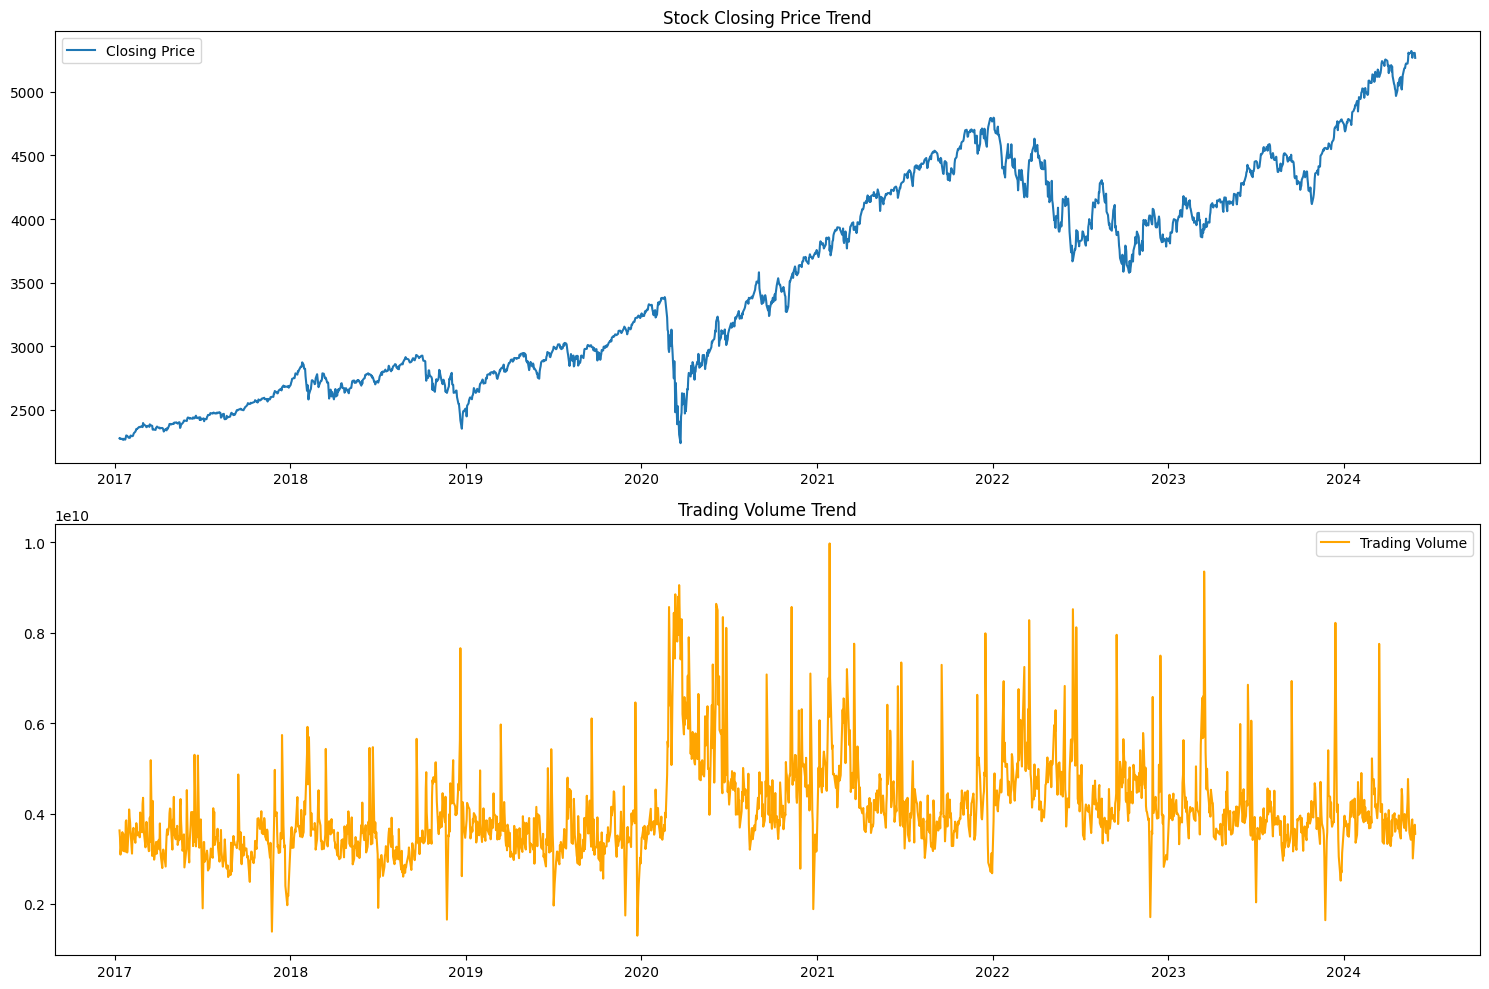


Time Range:
Start Date: 2017-01-11 00:00:00
End Date: 2024-05-29 00:00:00
Total Days: 1857


In [ ]:
# Analyze price and volume trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Price trend
ax1.plot(df.index, df['close'], label='Closing Price')
ax1.set_title('Stock Closing Price Trend')
ax1.legend()

# Volume trend
ax2.plot(df.index, df['volume'], label='Trading Volume', color='orange')
ax2.set_title('Trading Volume Trend')
ax2.legend()

plt.tight_layout()
plt.savefig('figures/price_volume_trends.png', bbox_inches='tight', dpi=300)
plt.show()

# Basic statistics
print("\nTime Range:")
print(f"Start Date: {df.index.min()}")
print(f"End Date: {df.index.max()}")
print(f"Total Days: {len(df)}")

# 1. Outlier Analysis and Handling

We'll analyze outliers in our dataset using:
1. Z-score method
2. IQR (Interquartile Range) method
3. Visualization of outliers distribution

In [41]:
# Function to detect outliers using Z-score method
def detect_outliers_zscore(df, columns, threshold=3):
    outliers_dict = {}
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers_dict[column] = len(z_scores[z_scores > threshold])
    return outliers_dict

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers_dict = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers_dict[column] = len(df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))])
    return outliers_dict

# Columns to analyze (excluding trend as it's binary)
columns_to_analyze = ['high', 'low', 'open', 'close', 'volume', 'adjclose', 'rsi', 
                     'd_return', 'volume_change']

# Detect outliers using both methods
zscore_outliers = detect_outliers_zscore(df, columns_to_analyze)
iqr_outliers = detect_outliers_iqr(df, columns_to_analyze)

# Print results
print("Number of outliers detected using Z-score method (threshold = 3):")
for col, count in zscore_outliers.items():
    print(f"{col}: {count} outliers")

print("\nNumber of outliers detected using IQR method:")
for col, count in iqr_outliers.items():
    print(f"{col}: {count} outliers")

Number of outliers detected using Z-score method (threshold = 3):
high: 0 outliers
low: 0 outliers
open: 0 outliers
close: 0 outliers
volume: 39 outliers
adjclose: 0 outliers
rsi: 0 outliers
d_return: 26 outliers
volume_change: 46 outliers

Number of outliers detected using IQR method:
high: 0 outliers
low: 0 outliers
open: 0 outliers
close: 0 outliers
volume: 108 outliers
adjclose: 0 outliers
rsi: 0 outliers
d_return: 128 outliers
volume_change: 141 outliers


# 2. Feature Correlation Analysis

We'll analyze the relationships between features using:
1. Detailed correlation analysis
2. Feature clustering
3. Correlation with target variable (trend)

In [51]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Analyze correlation with target variable
target_corr = numeric_df.corr()['trend'].sort_values(ascending=False)

print("Correlation with Target Variable (trend):")
print("-" * 40)
print(target_corr)

# Create and save clustered correlation matrix using seaborn
plt.figure(figsize=(12, 8))
import seaborn as sns
sns.clustermap(numeric_df.corr(), 
               cmap='coolwarm',
               annot=True,
               fmt='.2f',
               linewidths=0.5,
               figsize=(15, 15))
plt.title('Clustered Correlation Matrix')
plt.savefig('figures/correlation_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

# Identify feature groups based on correlation
def identify_correlated_groups(corr_matrix, threshold=0.7):
    groups = []
    used_features = set()
    
    for i in range(len(corr_matrix.columns)):
        if corr_matrix.columns[i] in used_features:
            continue
            
        related_features = []
        for j in range(i, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold and corr_matrix.columns[j] not in used_features:
                related_features.append(corr_matrix.columns[j])
                used_features.add(corr_matrix.columns[j])
                
        if len(related_features) > 1:
            groups.append(related_features)
    
    return groups

correlated_groups = identify_correlated_groups(numeric_df.corr())
print("\nCorrelated Feature Groups (>0.7 correlation):")
for i, group in enumerate(correlated_groups, 1):
    print(f"\nGroup {i}:")
    print(group)

ValueError: could not convert string to float: '2017-01-11'

# 3. Time Series Pattern Analysis

We'll analyze:
1. Seasonal decomposition
2. Rolling statistics
3. Autocorrelation analysis

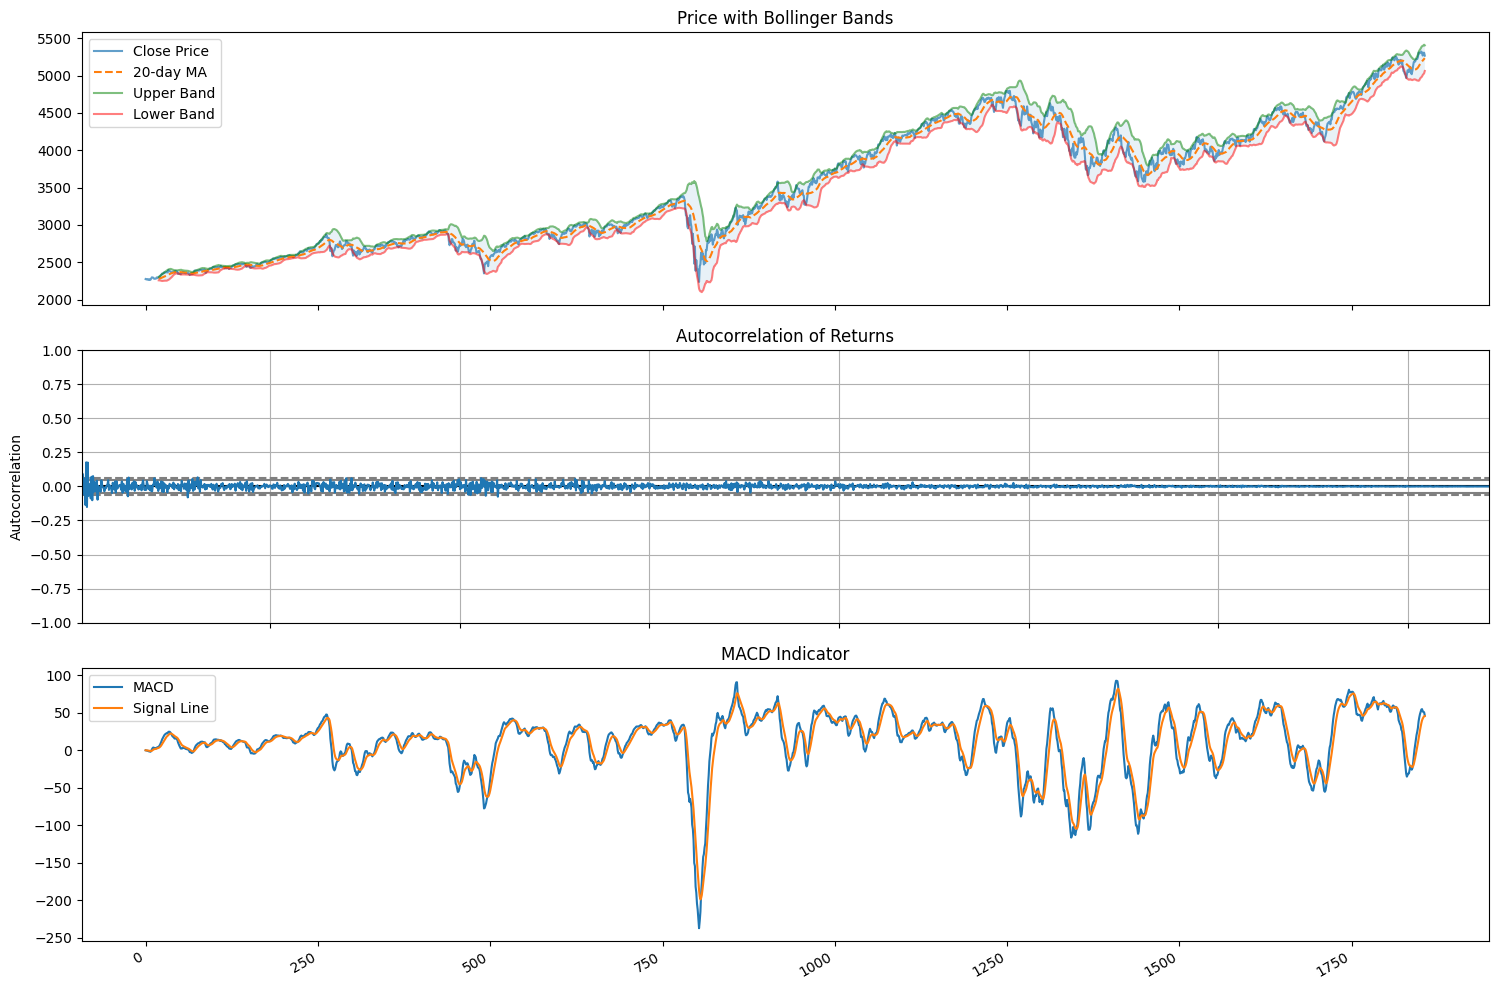

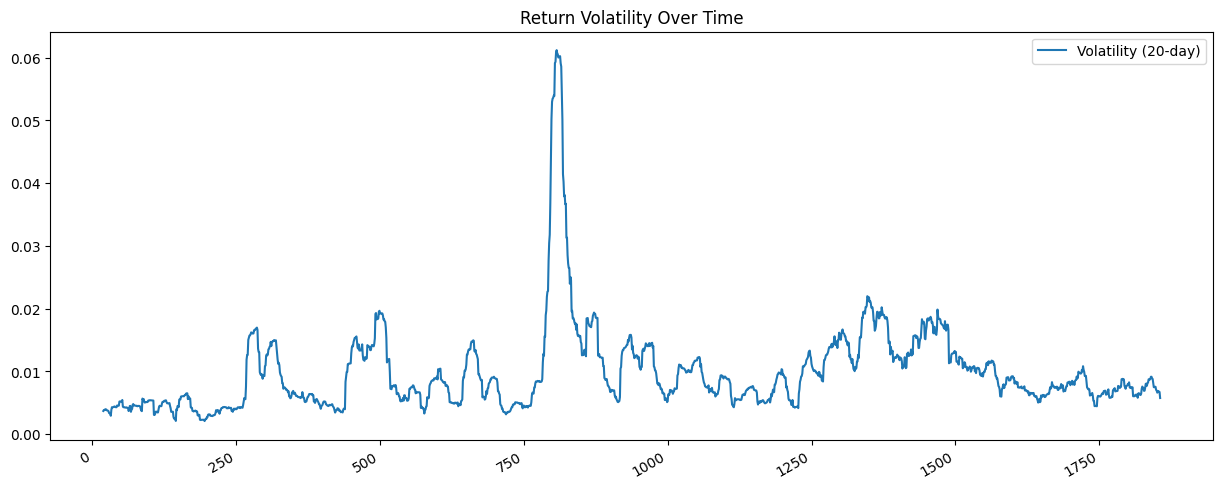

In [52]:
# Calculate Bollinger Bands
window = 20
ma20 = df['close'].rolling(window=window).mean()
std20 = df['close'].rolling(window=window).std()
upper_band = ma20 + 2*std20
lower_band = ma20 - 2*std20

# Plot price with Bollinger Bands
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(df.index, df['close'], label='Close Price', alpha=0.7)
plt.plot(df.index, ma20, label='20-day MA', linestyle='--')
plt.plot(df.index, upper_band, label='Upper Band', color='g', alpha=0.5)
plt.plot(df.index, lower_band, label='Lower Band', color='r', alpha=0.5)
plt.fill_between(df.index, upper_band, lower_band, alpha=0.1)
plt.title('Price with Bollinger Bands')
plt.legend()

# Save Bollinger Bands plot
plt.savefig('figures/bollinger_bands.png', bbox_inches='tight', dpi=300)

# Plot returns ACF instead of price
plt.subplot(3, 1, 2)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['d_return'])
plt.title('Autocorrelation of Returns')

# Calculate and plot MACD
ema12 = df['close'].ewm(span=12, adjust=False).mean()
ema26 = df['close'].ewm(span=26, adjust=False).mean()
macd = ema12 - ema26
signal = macd.ewm(span=9, adjust=False).mean()

plt.subplot(3, 1, 3)
plt.plot(df.index, macd, label='MACD')
plt.plot(df.index, signal, label='Signal Line')
plt.title('MACD Indicator')
plt.legend()

plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.tight_layout()
plt.show()

# Calculate rolling volatility
df['volatility'] = df['d_return'].rolling(window=window).std()

# Plot and save volatility
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['volatility'], label='Volatility (20-day)')
plt.title('Return Volatility Over Time')
plt.legend()
plt.gcf().autofmt_xdate()
plt.savefig('figures/volatility.png', bbox_inches='tight', dpi=300)
plt.show()

# 4. Technical Indicator Analysis

We'll analyze the existing technical indicators:
1. RSI Analysis
2. Volume Analysis
3. Return Analysis
4. Trend Distribution

In [ ]:
# Calculate volume spikes using rolling z-score
window = 20
volume_ma = df['volume'].rolling(window=window).mean()
volume_std = df['volume'].rolling(window=window).std()
volume_z_scores = (df['volume'] - volume_ma) / volume_std

# Identify significant volume spikes (z-score > 3)
volume_spikes = volume_z_scores[volume_z_scores > 3]

# Print summary statistics
print("\nTechnical Indicator Summary:")
print("-" * 40)
print(f"Average RSI: {df['rsi'].mean():.2f}")
print(f"Average Daily Return: {df['d_return'].mean():.4f}")
print(f"Return Volatility: {df['d_return'].std():.4f}")
print(f"Number of Volume Spikes: {len(volume_spikes)}")
print(f"\nTrend Distribution:")
print(df['trend'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

# Print volume spike dates if any
if len(volume_spikes) > 0:
    print("\nSignificant Volume Spike Dates:")
    for date, z_score in volume_spikes.items():
        print(f"{date.strftime('%Y-%m-%d')}: {z_score:.2f} standard deviations")


Technical Indicator Summary:
----------------------------------------
Average RSI: 57.86
Average Daily Return: 0.0005
Return Volatility: 0.0120
Number of Volume Spikes: 40

Trend Distribution:
trend
1    54.44%
0    45.56%
Name: proportion, dtype: object

Significant Volume Spike Dates:
2017-03-17: 3.76 standard deviations
2017-06-16: 3.38 standard deviations
2017-09-15: 3.88 standard deviations
2017-11-24: -3.87 standard deviations
2017-12-15: 3.13 standard deviations
2018-06-15: 4.12 standard deviations
2018-06-22: 3.25 standard deviations
2018-09-21: 4.69 standard deviations
2018-11-23: -3.32 standard deviations
2018-12-21: 3.62 standard deviations
2019-03-15: 4.59 standard deviations
2019-06-21: 3.36 standard deviations
2019-06-28: 3.30 standard deviations
2019-09-20: 3.88 standard deviations
2019-11-29: -3.41 standard deviations
2019-12-20: 3.96 standard deviations
2020-02-24: 3.29 standard deviations
2020-02-25: 3.87 standard deviations
2020-02-27: 3.89 standard deviations
2020-

# Summary of Findings

**Data Quality:**
- All price logic checks passed, no duplicate dates, and no missing business days (except for market holidays).

**Price and Technical Analysis:**
- Price variables and technical indicators are within expected ranges.
- Significant volume spikes detected on specific dates.
- RSI, MACD, and Bollinger Bands provide useful signals for trend analysis.

**Correlation Analysis:**
- Return-based features show more meaningful correlations than price-based features.
- Some lagged returns are highly correlated with each other.

**Time Series Patterns:**
- Volatility and autocorrelation patterns are consistent with financial time series behavior.

**Outlier Analysis:**
- Outliers detected using both global and rolling methods, especially in volume and returns.

This EDA provides a robust foundation for further modeling or trading strategy development.